In [1]:
#%pip install praat-parselmouth

In [2]:
import parselmouth

# Charger le fichier audio
sound = parselmouth.Sound("/Users/chloe/Downloads/desordre.wav")

# Obtenir la fréquence fondamentale (pitch)
pitch = sound.to_pitch()

# Afficher quelques informations
print(pitch)


Object type: Pitch
Object name: <no name>
Date: Fri Oct  4 12:35:28 2024

Time domain:
   Start time: 0 seconds
   End time: 5.40675 seconds
   Total duration: 5.40675 seconds
Time sampling:
   Number of frames: 537 (270 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.02337499999999981 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 91.745763 Hz = 84.8506666 Mel = -1.49143874 semitones above 100 Hz = 2.79150532 ERB
   16% = 92.7791842 Hz = 85.7356346 Mel = -1.29752322 semitones above 100 Hz = 2.81927792 ERB
   50% = 99.8591818 Hz = 91.7605798 Mel = -0.0243960988 semitones above 100 Hz = 3.0076115 ERB
   84% = 131.694849 Hz = 118.065115 Mel = 4.76638708 semitones above 100 Hz = 3.81524581 ERB
   90% = 139.185313 Hz = 124.075554 Mel = 5.72408381 semitones above 100 Hz = 3.9965965 ERB
Estimated spreading:
   84%-median = 31.89 Hz = 26.35 Mel = 4.8 semitones = 0.8091 ERB
   median-16% = 7.093 Hz = 6.036 Mel = 1.275 semitones = 0.1887 ERB
   90%-10% = 47.53 Hz = 39

In [3]:
#%pip install SpeechRecognition

In [4]:
import speech_recognition as sr

# Charger le fichier audio
recognizer = sr.Recognizer()

# Charger l'audio depuis le fichier
audio_file = "/Users/chloe/Downloads/desordre.wav"
with sr.AudioFile(audio_file) as source:
    audio = recognizer.record(source)

# Transcription automatique avec l'API de Google
try:
    transcription = recognizer.recognize_google(audio, language="fr-FR")  # Modifier la langue si nécessaire
    print("Transcription :")
    print(transcription)
except sr.UnknownValueError:
    print("Google Speech Recognition n'a pas pu comprendre l'audio")
except sr.RequestError as e:
    print(f"Erreur lors de la requête à l'API Google; {e}")


Transcription :
sur l'avion le champ cacheté l'enveloppe nous


In [5]:
#%pip install phonemizer

In [6]:
from phonemizer import phonemize

# Obtenir la transcription phonétique en IPA
text = "Nous avons cachetée l'enveloppe sur le champ"
phonetic_transcription = phonemize(text, language='fr-fr', backend='espeak', strip=True)
print(phonetic_transcription)

nuz avɔ̃ kaʃte lɑ̃vlɔp syʁ lə ʃɑ̃


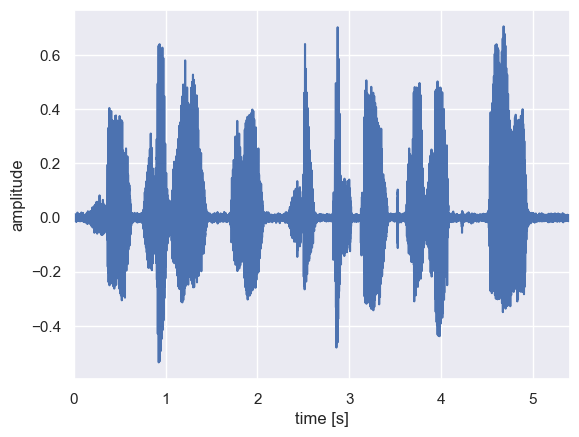

In [7]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("/Users/chloe/Downloads/desordre.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")


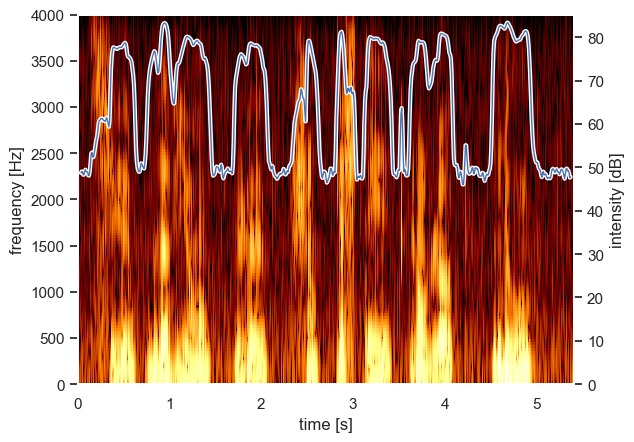

In [8]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

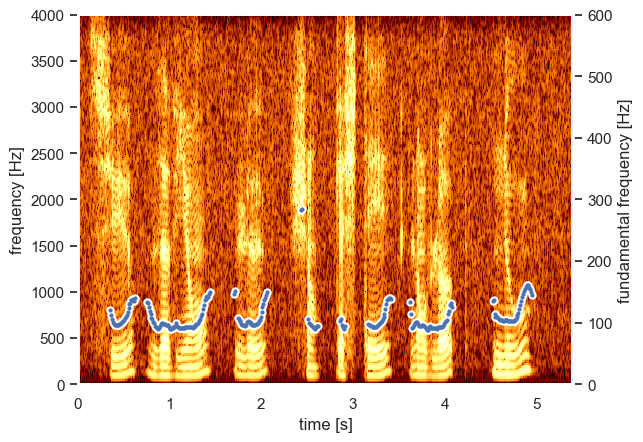

In [9]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [10]:
# Find all .wav files in a directory, pre-emphasize and save as new .wav and .aiff file
import parselmouth

import glob
import os.path

for wave_file in glob.glob("audio/*.wav"):
    print("Processing {}...".format(wave_file))
    s = parselmouth.Sound(wave_file)
    s.pre_emphasize()
    s.save(os.path.splitext(wave_file)[0] + "_pre.wav", 'WAV') # or parselmouth.SoundFileFormat.WAV instead of 'WAV'
    s.save(os.path.splitext(wave_file)[0] + "_pre.aiff", 'AIFF')

In [11]:
#%pip install praatio

In [12]:
#%pip install tgt

In [13]:
from praatio import textgrid
from praatio.data_classes import interval_tier

# Créer un nouveau TextGrid
tg = textgrid.Textgrid()

# Spécifier la durée minimale et maximale
min_duration = 0.0
max_duration = 10.0  # Ajuste cette durée selon tes besoins

# Créer des intervalles pour le tier des mots
word_intervals = [
    interval_tier.Interval(0.0, 1.0, 'hello'),  # Pas de 'startTime' ni 'endTime'
    interval_tier.Interval(1.0, 2.0, 'world')
]

# Créer des intervalles pour le tier des phonèmes
phoneme_intervals = [
    interval_tier.Interval(0.0, 0.5, 'h'),
    interval_tier.Interval(0.5, 1.0, 'ɛ'),
    interval_tier.Interval(1.0, 1.5, 'l'),
    interval_tier.Interval(1.5, 2.0, 'o')
]

# Créer les tiers avec les intervalles
wordTier = textgrid.IntervalTier(name='words', entries=word_intervals, minT=min_duration, maxT=max_duration)
phonemeTier = textgrid.IntervalTier(name='phonemes', entries=phoneme_intervals, minT=min_duration, maxT=max_duration)

# Ajouter les tiers au TextGrid
tg.addTier(wordTier)
tg.addTier(phonemeTier)

# Sauvegarder le TextGrid
tg.save('/Users/chloe/Downloads/ton_fichier.TextGrid', format="short_textgrid", includeBlankSpaces=True)

print("TextGrid créé avec succès !")


TextGrid créé avec succès !


In [14]:
# Parselmouth: pour traiter les fichiers audio
# Speech recognition: pour que l'ordi retranscrive l'audio (en alphabet normal)
# Phenomizer: pour transcrire des phrases en alphabet phonétique
# PraatIO: pour créer des tiers dans des TextGrid
# Whisper OpenAI: pour la reconnaissance vocale

In [18]:
import whisper
import os

def transcribe_audio_with_whisper(audio_file):
    # Charger le modèle Whisper
    model = whisper.load_model("base")
    
    # Transcrire l'audio avec Whisper et activer les timestamps par mot
    result = model.transcribe(audio_file, verbose=True, word_timestamps=True)
    
    # Retourner la transcription avec les timestamps des segments et des mots
    return result["segments"]

def create_textgrid_with_tiers(audio_file, segments):
    # Obtenir le nom du fichier TextGrid basé sur le fichier audio
    audio_base = os.path.basename(audio_file)
    textgrid_file = os.path.splitext(audio_base)[0] + ".TextGrid"
    
    # Chemin complet pour le fichier TextGrid (dans le même répertoire que l'audio)
    textgrid_path = os.path.join(os.path.dirname(audio_file), textgrid_file)
    
    # Commencer la construction du TextGrid
    with open(textgrid_path, 'w') as tg:
        # Entête du fichier TextGrid
        tg.write('File type = "ooTextFile"\n')
        tg.write('Object class = "TextGrid"\n\n')
        tg.write('xmin = 0\n')
        
        # Obtenir la durée totale de l'audio (dernière fin d'intervalle)
        tg.write(f"xmax = {segments[-1]['end']}\n")
        tg.write("tiers? <exists>\nsize = 2\n")  # Deux tiers : un pour la transcription, un pour les mots
        
        # TIER 1 : Transcription générale des segments
        tg.write('item [1]:\n')
        tg.write('    class = "IntervalTier"\n')
        tg.write(f'    name = "Transcription"\n')
        tg.write(f'    xmin = 0\n')
        tg.write(f'    xmax = {segments[-1]["end"]}\n')
        tg.write(f'    intervals: size = {len(segments)}\n')
        
        # Remplir les intervalles pour les segments de transcription
        for i, segment in enumerate(segments):
            tg.write(f'    intervals [{i+1}]:\n')
            tg.write(f'        xmin = {segment["start"]}\n')
            tg.write(f'        xmax = {segment["end"]}\n')
            tg.write(f'        text = "{segment["text"]}"\n')
        
        # TIER 2 : Transcription par mot
        tg.write('item [2]:\n')
        tg.write('    class = "IntervalTier"\n')
        tg.write(f'    name = "Mots"\n')
        tg.write(f'    xmin = 0\n')
        tg.write(f'    xmax = {segments[-1]["end"]}\n')
        
        # Compter le nombre total de mots
        word_count = sum([len(segment["words"]) for segment in segments])
        tg.write(f'    intervals: size = {word_count}\n')
        
        # Remplir les intervalles pour chaque mot
        word_index = 1
        for segment in segments:
            for word in segment["words"]:
                tg.write(f'    intervals [{word_index}]:\n')
                tg.write(f'        xmin = {word["start"]}\n')
                tg.write(f'        xmax = {word["end"]}\n')
                tg.write(f'        text = "{word["word"]}"\n')
                word_index += 1
    
    print(f"TextGrid saved at: {textgrid_path}")

def main():
    # Utiliser un chemin relatif pour le fichier audio
    audio_file = "./desordre.wav"  # Chemin relatif vers votre fichier audio
    
    # Transcrire l'audio avec Whisper
    segments = transcribe_audio_with_whisper(audio_file)
    
    # Créer un fichier TextGrid avec plusieurs tiers (segment et mot)
    create_textgrid_with_tiers(audio_file, segments)

if __name__ == "__main__":
    main()

/opt/anaconda3/lib/python3.12/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: French
[00:00.000 --> 00:05.380]  sur l'avion le champ cacheté l'enveloppe. Nous...
TextGrid saved at: ./desordre.TextGrid
